# Fall 2021 Data Science Intern Challenge

* [Q1. Analysis](#q1)
* [Q2. SQL](#q2)

---
<a id='q1'></a>
### Q1 Given some sample data, write a program to answer the following:
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* What metric would you report for this dataset?
* What is its value?

In [1]:
# Load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
# Load data
df = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')
size = df.shape[0]
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [3]:
summary = df.order_amount.describe()
summary

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The Mean is way higher than the median and the standard deviation is very large. The dataset must contains outliers that have very large which means the values are spread out over a wider range. The max has reached to 704000, but the min value was only 90.

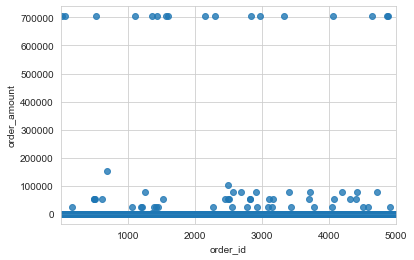

In [4]:
ax = sns.regplot(data=df, x="order_id", y="order_amount")

From the graph above, we can see there are not only one outliers in the dataset. 

We first check out these outliers shown on the top of the plot:

In [5]:
outliers = df[df.order_amount > 600000].sort_values('created_at')
print('Number of outliers: ', outliers.shape[0])
outliers

Number of outliers:  17


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


There are 17 records are considered as outliers. All of them are placed by the same user id(607) in the same shop(42) with the same order amount(704000). In addition, they are all placed exactly at 4am in the morning. It is hard to define if these are automated orders placement or miss entried duplicate data. 

The dot at the bottom of the plot was clustered together and cannot see if there are also outliers. In this case, we can take the data in the range of interquartile range(IQR).

In [6]:
# Define ranges
Q25 = summary['25%']
Q75 = summary['75%']
IQR = Q75 - Q25
lower_bound = Q25 - 1.5*IQR
upper_bound = Q75 + 1.5*IQR
print('25 Percentile: ', Q25)
print('75 Percentile: ', Q75)
print('IQR: ', IQR)
print('\nLower Bound of order_amount: ', lower_bound)
print('Upper Bound of order_amount: ', upper_bound)

25 Percentile:  163.0
75 Percentile:  390.0
IQR:  227.0

Lower Bound of order_amount:  -177.5
Upper Bound of order_amount:  730.5


In [7]:
# Remove outliers from dataset
df = df[(df['order_amount'] >= lower_bound) & (df['order_amount'] <= upper_bound)]
print('Removed {} outliers from dataset'.format(size - df.shape[0]))
df

Removed 141 outliers from dataset


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [8]:
summary = df.order_amount.describe()
summary

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

After we removed the outliers, the new mean closed to the median. The new AOV is $293.72

--- 
<a id='q2'></a>
## Q2.  SQL
Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### 1. How many orders were shipped by Speedy Express in total?
```sql
SELECT COUNT(*)
FROM Orders AS o, Shippers AS s
WHERE o.ShipperID = s.ShipperID
AND s.ShipperName = 'Speedy Express';
```
**Answer**: 54

#### 2. What is the last name of the employee with the most orders?
```sql
SELECT e.EmployeeID, e.LastName, COUNT(*) AS Count
FROM Orders AS o, Employees AS e
WHERE o.EmployeeID = e.EmployeeID
GROUP BY o.EmployeeID
ORDER BY Count DESC
LIMIT 1;
```
**Answer**: Peacock (EmpolyeeID: 4, Order Count: 40)

#### 3. What product was ordered the most by customers in Germany?
```sql
SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity
FROM Orders AS o, OrderDetails AS d, Customers AS c, Products AS p
WHERE c.CustomerID = o.CustomerID
AND d.ProductID = p.ProductID
AND d.OrderID = o.OrderID
AND c.Country = "Germany" 
GROUP BY p.ProductID
ORDER BY TotalQuantity DESC
LIMIT 1;
```
**Answer**: Boston Crab Meat (productID: 40, TotalQuantity: 160)